In [318]:
# Load libraries and dataset
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


# Load Titanic dataset from seaborn
df = sns.load_dataset('titanic')

# print head
df.head()
# test = df['class']
# print(test)



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [319]:
# Drop not needed columns
df = df.drop(columns=['pclass', 'embark_town', 'deck', 'adult_male', 'alone','fare','embarked','who', 'alive'], errors='ignore')
# Drop rows where 'age' is missing
df = df.dropna(subset=['age'])

df.head()


,survived,sex,age,sibsp,parch,class
0,0,male,22.0,1,0,Third
1,1,female,38.0,1,0,First
2,1,female,26.0,0,0,Third
3,1,female,35.0,1,0,First
4,0,male,35.0,0,0,Third


In [320]:
# feature: sex, age, class, family_size
# target = alive

In [321]:
d = {'First': 1, 'Second': 2, 'Third': 3} # assign numerical values to class
df['class'] = df['class'].map(d)
df.head()

,survived,sex,age,sibsp,parch,class
0,0,male,22.0,1,0,3
1,1,female,38.0,1,0,1
2,1,female,26.0,0,0,3
3,1,female,35.0,1,0,1
4,0,male,35.0,0,0,3


In [322]:
df['family_size'] = df['sibsp'] + df['parch']
df = df.drop(columns=['sibsp', 'parch'], errors='ignore')
df.head(10)

,survived,sex,age,class,family_size
0,0,male,22.0,3,1
1,1,female,38.0,1,1
2,1,female,26.0,3,0
3,1,female,35.0,1,1
4,0,male,35.0,3,0
6,0,male,54.0,1,0
7,0,male,2.0,3,4
8,1,female,27.0,3,2
9,1,female,14.0,2,1
10,1,female,4.0,3,2


In [323]:
# 1 = man, 2 = woman
d = {'male': 1, 'female': 2} # assign numerical values to sex
df['sex'] = df['sex'].map(d)
df.head()

,survived,sex,age,class,family_size
0,0,1,22.0,3,1
1,1,2,38.0,1,1
2,1,2,26.0,3,0
3,1,2,35.0,1,1
4,0,1,35.0,3,0


In [324]:
# Define a function to categorize ages
def categorize_age(age):
    if age < 12:
        return 1
    elif age < 19:
        return 2
    elif age < 35:
        return 3
    elif age < 60:
        return 4
    else:
        return 5

# Apply the function to create the 'age_group' column
df['age_group'] = df['age'].apply(categorize_age)

# Drop the original 'age' column
df = df.drop(columns='age', errors='ignore')

# 1 = child, 2 = teen, 3 = young adult, 4 = adult, 5 = senior

# Show the first 10 rows
df.head(10)


,survived,sex,class,family_size,age_group
0,0,1,3,1,3
1,1,2,1,1,4
2,1,2,3,0,3
3,1,2,1,1,4
4,0,1,3,0,4
6,0,1,1,0,4
7,0,1,3,4,1
8,1,2,3,2,3
9,1,2,2,1,2
10,1,2,3,2,1


In [325]:
features = ['sex', 'age_group', 'class', 'family_size']

X = df[features]
y = df['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [326]:
# Initialize the decision tree classifier
dtree = DecisionTreeClassifier(max_depth=5)

# Fit the model on the training data
dtree.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dtree.predict(X_test)

In [327]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        87
           1       0.78      0.71      0.75        56

    accuracy                           0.81       143
   macro avg       0.81      0.79      0.80       143
weighted avg       0.81      0.81      0.81       143

Confusion Matrix:
[[76 11]
 [16 40]]


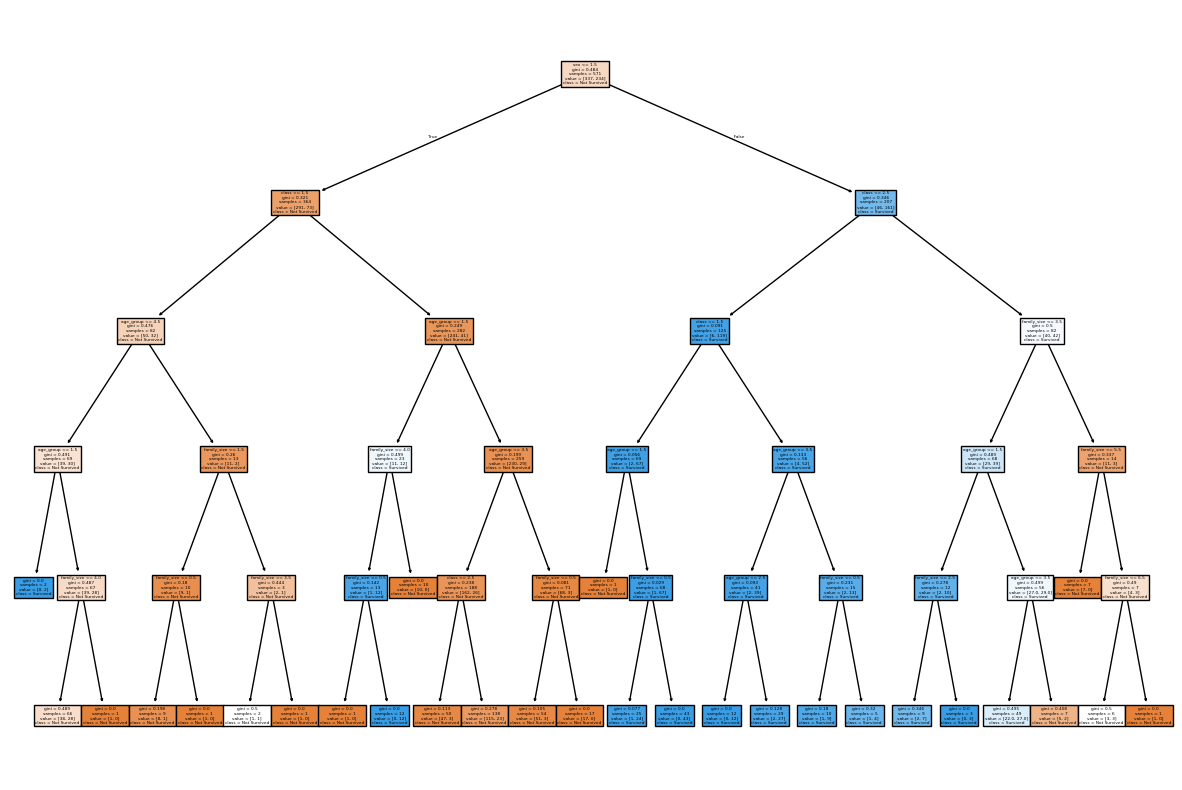

In [328]:
plt.figure(figsize=(15, 10))
plot_tree(dtree, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()